***Syntax natürlicher Sprachen, WS 2021/22***

---
# Übung 13

In [139]:
# conda install -c anaconda scikit-learn 
# pip install -U scikit-learn 
# pip3 install -U scikit-learn
from sklearn.metrics import accuracy_score, precision_score,\
    recall_score, f1_score
import nltk

--- 
## Aufgabe 1: Evaluationsmetriken

#### Betrachten Sie folgende Daten. Es handelt sich um ein vereinfachtes Tagging-Schema fürs Chunking, bei dem nur zwischen „Teil einer NP“ (`1`) und „nicht Teil einer NP“ (`0`) unterschieden wird.

In [10]:
ground_truth = [1,0,1,0,0,1,1,1,1,0]
chunker1     = [1,1,1,0,1,0,1,1,1,1]
chunker2     = [1,0,1,0,0,0,0,0,1,0]
chunker3     = [0,0,0,0,0,1,1,1,1,0]

#### Berechnen Sie für jeden der Chunker Accuracy, Precision, Recall und F1-Score zunächst per Hand und überprüfen Sie dann Ihr Ergebnis mit dem folgenden Code.

In [140]:
def f1(prec, recall):
    return 2*prec*recall/(prec+recall)

chunker1_acc = 6/10
chunker1_prec = 5/8
chunker1_recall = 5/6
chunker1_f1 = f1(chunker1_prec, chunker1_recall)

print("chunker1_acc:", chunker1_acc)
print("chunker1_prec:", chunker1_prec)
print("chunker1_recall:", chunker1_recall)
print("chunker1_f1:", chunker1_f1)

chunker1_acc: 0.6
chunker1_prec: 0.625
chunker1_recall: 0.8333333333333334
chunker1_f1: 0.7142857142857143


In [142]:
def f1(prec, recall):
    return 2*prec*recall/(prec+recall)

chunker2_acc = 7/10
chunker2_prec = 3/3
chunker2_recall = 3/6
chunker2_f1 = f1(chunker2_prec, chunker2_recall)

print("chunker2_acc:", chunker2_acc)
print("chunker2_prec:", chunker2_prec)
print("chunker2_recall:", chunker2_recall)
print("chunker2_f1:", chunker2_f1)

chunker2_acc: 0.7
chunker2_prec: 1.0
chunker2_recall: 0.5
chunker2_f1: 0.6666666666666666


In [144]:
def f1(prec, recall):
    return 2*prec*recall/(prec+recall)

chunker3_acc = 8/10
chunker3_prec = 4/4
chunker3_recall = 4/6
chunker3_f1 = f1(chunker3_prec, chunker3_recall)

print("chunker3_acc:", chunker3_acc)
print("chunker3_prec:", chunker3_prec)
print("chunker3_recall:", chunker3_recall)
print("chunker3_f1:", chunker3_f1)

chunker3_acc: 0.8
chunker3_prec: 1.0
chunker3_recall: 0.6666666666666666
chunker3_f1: 0.8


In [145]:
def evaluate(chunker):
    print(
        "Accuracy:",
        "{:.2f}".format(accuracy_score(ground_truth, chunker))
    )
    print(
        "Precision:",
        "{:.2f}".format(precision_score(ground_truth, chunker))
    )
    print(
        "Recall:",
        "{:.2f}".format(recall_score(ground_truth, chunker))
    )
    print(
        "F1-Score:",
        "{:.2f}".format(f1_score(ground_truth, chunker))
    )

In [146]:
evaluate(chunker1)

Accuracy: 0.60
Precision: 0.62
Recall: 0.83
F1-Score: 0.71


In [147]:
evaluate(chunker2)

Accuracy: 0.70
Precision: 1.00
Recall: 0.50
F1-Score: 0.67


In [148]:
evaluate(chunker3)

Accuracy: 0.80
Precision: 1.00
Recall: 0.67
F1-Score: 0.80


---
## Aufgabe 2: Herunterladen von Ressourcen

#### Das CoNLL 2000 Korpus ist ein POS- und Chunk-getaggtes Korpus (IOB- Format), das in ein Test- und ein Trainingskorpus aufgeteilt ist. Wir werden es zum Training und zur Evaluation von Chunk-Parsern verwenden. Laden Sie es sich dafür zunächst über die Ressource `corpora/conll2000` herunter.

In [149]:
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> l

Packages:
  [*] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [*] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [*] book_grammars....... Grammars from NLTK Book
  [*] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)
  [ ] cess_cat............ CESS-CAT Treebank
  [ ] cess_esp............ CESS-ESP Treebank
  [*] chat80.....

True

#### Wenn Sie es erfolgreich heruntergeladen haben, können Sie folgendermaßen darauf zugreifen:

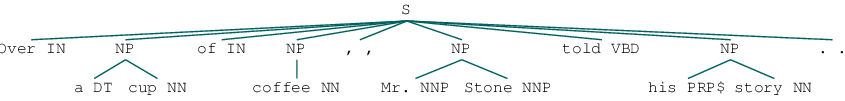

In [15]:
from nltk.corpus import conll2000
conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99]

# If tk doesn't work use the following
# from nltk.tree import Tree
# tree = conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99]
# tree.pretty_print(unicodelines=True)

In [199]:
from nltk.tree import Tree
tree = conll2000.chunked_sents('train.txt')[99]
tree.pretty_print(unicodelines=True)

                                  S                                                                 
 ┌───┬─────┬──────────┬───────────┼───────┬──────────────┬───────────────┬───────────────┐           
 │   │     PP         NP          PP      NP             NP              VP              NP         
 │   │     │     ┌────┴────┐      │       │        ┌─────┴──────┐        │        ┌──────┴─────┐     
,/, ./. Over/IN a/DT     cup/NN of/IN coffee/NN Mr./NNP     Stone/NNP told/VBD his/PRP$     story/NN



In [154]:
nltk.chunk.tree2conlltags(conll2000.chunked_sents('train.txt', chunk_types=['NP'])[99])

[('Over', 'IN', 'O'),
 ('a', 'DT', 'B-NP'),
 ('cup', 'NN', 'I-NP'),
 ('of', 'IN', 'O'),
 ('coffee', 'NN', 'B-NP'),
 (',', ',', 'O'),
 ('Mr.', 'NNP', 'B-NP'),
 ('Stone', 'NNP', 'I-NP'),
 ('told', 'VBD', 'O'),
 ('his', 'PRP$', 'B-NP'),
 ('story', 'NN', 'I-NP'),
 ('.', '.', 'O')]

#### Das `chunk_types`-Argument dient der Auwahl von Chunk-Typen (in diesem Beispiel Nominalphrasen).

--- 
## Aufgabe 3: Chunking mit regulären Ausdrücken

#### Erstellen Sie einen einfachen `RegexpParser`, der für Nominalphrasen charakteristische Tags zu NPs zusammenfasst. Solche charakteristischen Tags sind z.B. Kardinalzahlen (`CD`), Artikel (`DT`), Adjektive (`JJ`, `JJR`, `JJS`) und natürlich Substantive (`NN`, `NNS`, `NNP`, `NNPS`).

#### Weitere interessante Tags wären `PDT` (z.B. *both*, *a lot of*), `POS` (*'s*), `PRP` (Personalpronomen), `PRP$`(Possessivpronomen).

In [155]:
test_sents = conll2000.chunked_sents('test.txt', chunk_types=['NP'])

#### Evaluieren Sie Ihren Parser anschließend auf dem CoNLL 2000 Korpus:

In [170]:
regex = r"NP: {(<CD>|<DT>|<JJ>|<JJ.>|<POS>|<PRP>|<PRP\$>|<PDT>|<NNPS>|<NN>|<NN.>)+}"
cp = nltk.RegexpParser(regex)
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  89.4%%
    Precision:     73.0%%
    Recall:        72.7%%
    F-Measure:     72.9%%


In [175]:
regex = r"NP: {(<DT>|<CD>|<PRP\$>)?(<JJ>|<JJ.>)*(<POS>|<PRP\$>|<PDT>|<NNPS>|<NN>|<NN.>)+|<PRP>}"
cp = nltk.RegexpParser(regex)
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  87.0%%
    Precision:     77.6%%
    Recall:        70.9%%
    F-Measure:     74.1%%


In [177]:
ex = "my mother's three best friends"
regex = r"NP: {(<PRP\$>)?(<DT>|<CD>)?(<JJ>|<JJ.>)*(<NNPS>|<NN>|<NN.>)+|<PRP>}"
cp = nltk.RegexpParser(regex)
print(cp.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  86.4%%
    Precision:     79.7%%
    Recall:        74.4%%
    F-Measure:     77.0%%


In [196]:
ex = "my mother's three best friends"
regex = r"""NP: {(<PRP\$>)?((<NNPS>|<NN>|<NN.>)|<POS>)?(<DT>|<CD>)?(<JJ>|<JJ.>)*(<NNPS>|<NN>|<NN.>)+}  
            NP: {<PRP>} # PRP rule
            NP: 
"""

cp = nltk.RegexpParser(regex, trace=1)
print(cp.evaluate(test_sents))

# Input:
 <NNP>  <NNP>  <NNP>  <POS>  <NNP>  <NN>  <VBD>  <PRP>  <VBD>  <DT>  <JJ>  <NN>  <VBG>  <PRP$>  <NN>  <IN>  <NNP>  <NNP>  <TO>  <VB>  <JJ>  <NNS>  <IN>  <NNP>  <POS>  <CD>  <NNS>  <.> 
# :
{<NNP>  <NNP>  <NNP>}{<POS>  <NNP>  <NN>} <VBD>  <PRP>  <VBD> {<DT>  <JJ>  <NN>} <VBG> {<PRP$>  <NN>} <IN> {<NNP>  <NNP>} <TO>  <VB> {<JJ>  <NNS>} <IN> {<NNP>}{<POS>  <CD>  <NNS>} <.> 
# Input:
 <NP>  <NP>  <VBD>  <PRP>  <VBD>  <NP>  <VBG>  <NP>  <IN>  <NP>  <TO>  <VB>  <NP>  <IN>  <NP>  <NP>  <.> 
# PRP rule:
 <NP>  <NP>  <VBD> {<PRP>} <VBD>  <NP>  <VBG>  <NP>  <IN>  <NP>  <TO>  <VB>  <NP>  <IN>  <NP>  <NP>  <.> 
# Input:
 <NNP>  <VBD>  <DT>  <NN>  <VBZ>  <IN>  <PRP>  <TO>  <VB>  <CD>  <JJ>  <JJ>  <NNS>  <IN>  <DT>  <NNS>  <.> 
# :
{<NNP>} <VBD> {<DT>  <NN>} <VBZ>  <IN>  <PRP>  <TO>  <VB> {<CD>  <JJ>  <JJ>  <NNS>} <IN> {<DT>  <NNS>} <.> 
# Input:
 <NP>  <VBD>  <NP>  <VBZ>  <IN>  <PRP>  <TO>  <VB>  <NP>  <IN>  <NP>  <.> 
# PRP rule:
 <NP>  <VBD>  <NP>  <VBZ>  <IN> {<PRP>} <TO>  <VB>  <NP>  <

# Input:
 <DT>  <NN>  <RB>  <VBD>  <NN>  <NNS>  <IN>  <DT>  <NN>  <VBD>  <PRP>  <RB>  <JJR>  <TO>  <VB>  <.> 
# :
{<DT>  <NN>} <RB>  <VBD> {<NN>  <NNS>} <IN> {<DT>  <NN>} <VBD>  <PRP>  <RB>  <JJR>  <TO>  <VB>  <.> 
# Input:
 <NP>  <RB>  <VBD>  <NP>  <IN>  <NP>  <VBD>  <PRP>  <RB>  <JJR>  <TO>  <VB>  <.> 
# PRP rule:
 <NP>  <RB>  <VBD>  <NP>  <IN>  <NP>  <VBD> {<PRP>} <RB>  <JJR>  <TO>  <VB>  <.> 
# Input:
 <``>  <PRP>  <VBD>  <IN>  <DT>  <NN>  <IN>  <NNP>  <,>  <''>  <VBZ>  <NNP>  <NNP>  <.> 
# :
 <``>  <PRP>  <VBD>  <IN> {<DT>  <NN>} <IN> {<NNP>} <,>  <''>  <VBZ> {<NNP>  <NNP>} <.> 
# Input:
 <``>  <PRP>  <VBD>  <IN>  <NP>  <IN>  <NP>  <,>  <''>  <VBZ>  <NP>  <.> 
# PRP rule:
 <``> {<PRP>} <VBD>  <IN>  <NP>  <IN>  <NP>  <,>  <''>  <VBZ>  <NP>  <.> 
# Input:
 <``>  <NNP>  <VBD>  <DT>  <JJ>  <NN>  <.> 
# :
 <``> {<NNP>} <VBD> {<DT>  <JJ>  <NN>} <.> 
# Input:
 <``>  <NP>  <VBD>  <NP>  <.> 
# PRP rule:
 <``>  <NP>  <VBD>  <NP>  <.> 
# Input:
 <PRP>  <VBD>  <JJ>  <.> 
# :
 <PRP>  <VBD>  <J

# Input:
 <RB>  <DT>  <JJ>  <NN>  <VBD>  <DT>  <NN>  <IN>  <JJ>  <NN>  <NNS>  <,>  <WDT>  <VBD>  <JJ>  <NN>  <.> 
# :
 <RB> {<DT>  <JJ>  <NN>} <VBD> {<DT>  <NN>} <IN> {<JJ>  <NN>  <NNS>} <,>  <WDT>  <VBD> {<JJ>  <NN>} <.> 
# Input:
 <RB>  <NP>  <VBD>  <NP>  <IN>  <NP>  <,>  <WDT>  <VBD>  <NP>  <.> 
# PRP rule:
 <RB>  <NP>  <VBD>  <NP>  <IN>  <NP>  <,>  <WDT>  <VBD>  <NP>  <.> 
# Input:
 <DT>  <NN>  <RB>  <VBD>  <PRP$>  <JJ>  <NN>  <NN>  <,>  <VBN>  <JJ>  <NN>  <CC>  <RB>  <VBN>  <NN>  <CC>  <NN>  <.> 
# :
{<DT>  <NN>} <RB>  <VBD> {<PRP$>  <JJ>  <NN>  <NN>} <,>  <VBN> {<JJ>  <NN>} <CC>  <RB>  <VBN> {<NN>} <CC> {<NN>} <.> 
# Input:
 <NP>  <RB>  <VBD>  <NP>  <,>  <VBN>  <NP>  <CC>  <RB>  <VBN>  <NP>  <CC>  <NP>  <.> 
# PRP rule:
 <NP>  <RB>  <VBD>  <NP>  <,>  <VBN>  <NP>  <CC>  <RB>  <VBN>  <NP>  <CC>  <NP>  <.> 
# Input:
 <JJS>  <JJ>  <NNS>  <VBD>  <VBN>  <IN>  <DT>  <JJ>  <NN>  <.> 
# :
{<JJS>  <JJ>  <NNS>} <VBD>  <VBN>  <IN> {<DT>  <JJ>  <NN>} <.> 
# Input:
 <NP>  <VBD>  <VBN>  <IN>  <

# Input:
 <CC>  <NNP>  <RB>  <MD>  <VB>  <DT>  <NN>  <IN>  <JJ>  <NN>  <DT>  <NN>  <CC>  <JJ>  <,>  <NNP>  <VBZ>  <.> 
# :
 <CC> {<NNP>} <RB>  <MD>  <VB> {<DT>  <NN>} <IN> {<JJ>  <NN>}{<DT>  <NN>} <CC>  <JJ>  <,> {<NNP>} <VBZ>  <.> 
# Input:
 <CC>  <NP>  <RB>  <MD>  <VB>  <NP>  <IN>  <NP>  <NP>  <CC>  <JJ>  <,>  <NP>  <VBZ>  <.> 
# PRP rule:
 <CC>  <NP>  <RB>  <MD>  <VB>  <NP>  <IN>  <NP>  <NP>  <CC>  <JJ>  <,>  <NP>  <VBZ>  <.> 
# Input:
 <NNP>  <VBZ>  <NNS>  <MD>  <VB>  <VB>  <IN>  <JJ>  <NNS>  <IN>  <NN>  <NNS>  <.> 
# :
{<NNP>} <VBZ> {<NNS>} <MD>  <VB>  <VB>  <IN> {<JJ>  <NNS>} <IN> {<NN>  <NNS>} <.> 
# Input:
 <NP>  <VBZ>  <NP>  <MD>  <VB>  <VB>  <IN>  <NP>  <IN>  <NP>  <.> 
# PRP rule:
 <NP>  <VBZ>  <NP>  <MD>  <VB>  <VB>  <IN>  <NP>  <IN>  <NP>  <.> 
# Input:
 <DT>  <NN>  <VBZ>  <JJ>  <NNS>  <VBN>  <IN>  <DT>  <NN>  <IN>  <NN>  <NNS>  <,>  <RB>  <RB>  <IN>  <NNS>  <RB>  <VBN>  <IN>  <JJ>  <CD>  <NNS>  <.> 
# :
{<DT>  <NN>} <VBZ> {<JJ>  <NNS>} <VBN>  <IN> {<DT>  <NN>} <IN> {<NN> 

# Input:
 <JJ>  <NN>  <CC>  <NN>  <NNS>  <IN>  <NN>  <NNS>  <IN>  <DT>  <NNP>  <IN>  <NNP>  <NNP>  <CC>  <NNP>  <VBD>  <``>  <RB>  <JJ>  <,>  <RB>  <JJ>  <,>  <''>  <DT>  <NN>  <VBD>  <,>  <CC>  <NN>  <IN>  <DT>  <NN>  <VBD>  <CD>  <NN>  <.> 
# :
{<JJ>  <NN>} <CC> {<NN>  <NNS>} <IN> {<NN>  <NNS>} <IN> {<DT>  <NNP>} <IN> {<NNP>  <NNP>} <CC> {<NNP>} <VBD>  <``>  <RB>  <JJ>  <,>  <RB>  <JJ>  <,>  <''> {<DT>  <NN>} <VBD>  <,>  <CC> {<NN>} <IN> {<DT>  <NN>} <VBD> {<CD>  <NN>} <.> 
# Input:
 <NP>  <CC>  <NP>  <IN>  <NP>  <IN>  <NP>  <IN>  <NP>  <CC>  <NP>  <VBD>  <``>  <RB>  <JJ>  <,>  <RB>  <JJ>  <,>  <''>  <NP>  <VBD>  <,>  <CC>  <NP>  <IN>  <NP>  <VBD>  <NP>  <.> 
# PRP rule:
 <NP>  <CC>  <NP>  <IN>  <NP>  <IN>  <NP>  <IN>  <NP>  <CC>  <NP>  <VBD>  <``>  <RB>  <JJ>  <,>  <RB>  <JJ>  <,>  <''>  <NP>  <VBD>  <,>  <CC>  <NP>  <IN>  <NP>  <VBD>  <NP>  <.> 
# Input:
 <DT>  <JJ>  <NN>  <NN>  <VBD>  <``>  <NN>  <NNS>  <CC>  <JJ>  <NN>  <NNS>  <,>  <''>  <DT>  <NN>  <VBD>  <DT>  <NN>  <NNS>  <IN>

# Input:
 <NNP>  <VBD>  <TO>  <VB>  <IN>  <NNP>  <CC>  <VBD>  <IN>  <DT>  <JJ>  <NN>  <WDT>  <VBZ>  <VBN>  <NN>  <NNS>  <IN>  <JJR>  <IN>  <DT>  <NN>  <:>  <VBG>  <IN>  <NN>  <NNS>  <,>  <WP>  <VBP>  <TO>  <VB>  <DT>  <JJS>  <JJ>  <NN>  <IN>  <PRP$>  <NN>  <.> 
# :
{<NNP>} <VBD>  <TO>  <VB>  <IN> {<NNP>} <CC>  <VBD>  <IN> {<DT>  <JJ>  <NN>} <WDT>  <VBZ>  <VBN> {<NN>  <NNS>} <IN>  <JJR>  <IN> {<DT>  <NN>} <:>  <VBG>  <IN> {<NN>  <NNS>} <,>  <WP>  <VBP>  <TO>  <VB> {<DT>  <JJS>  <JJ>  <NN>} <IN> {<PRP$>  <NN>} <.> 
# Input:
 <NP>  <VBD>  <TO>  <VB>  <IN>  <NP>  <CC>  <VBD>  <IN>  <NP>  <WDT>  <VBZ>  <VBN>  <NP>  <IN>  <JJR>  <IN>  <NP>  <:>  <VBG>  <IN>  <NP>  <,>  <WP>  <VBP>  <TO>  <VB>  <NP>  <IN>  <NP>  <.> 
# PRP rule:
 <NP>  <VBD>  <TO>  <VB>  <IN>  <NP>  <CC>  <VBD>  <IN>  <NP>  <WDT>  <VBZ>  <VBN>  <NP>  <IN>  <JJR>  <IN>  <NP>  <:>  <VBG>  <IN>  <NP>  <,>  <WP>  <VBP>  <TO>  <VB>  <NP>  <IN>  <NP>  <.> 
# Input:
 <``>  <NNP>  <NN>  <NN>  <VBZ>  <VBG>  <IN>  <DT>  <NN>  <IN>  <$>

# Input:
 <DT>  <RB>  <VBZ>  <IN>  <DT>  <JJ>  <NN>  <.> 
# :
 <DT>  <RB>  <VBZ>  <IN> {<DT>  <JJ>  <NN>} <.> 
# Input:
 <DT>  <RB>  <VBZ>  <IN>  <NP>  <.> 
# PRP rule:
 <DT>  <RB>  <VBZ>  <IN>  <NP>  <.> 
# Input:
 <WP>  <VBZ>  <RB>  <VBG>  <IN>  <RB>  <.> 
# :
 <WP>  <VBZ>  <RB>  <VBG>  <IN>  <RB>  <.> 
# Input:
 <WP>  <VBZ>  <RB>  <VBG>  <IN>  <RB>  <.> 
# PRP rule:
 <WP>  <VBZ>  <RB>  <VBG>  <IN>  <RB>  <.> 
# Input:
 <DT>  <CD>  <RBS>  <JJ>  <NNS>  <TO>  <VB>  <IN>  <NNP>  <NNP>  <VBZ>  <IN>  <PRP>  <VBZ>  <DT>  <JJ>  <JJ>  <JJ>  <:>  <DT>  <JJ>  <NN>  <TO>  <DT>  <JJ>  <NN>  <.> 
# :
 <DT>  <CD>  <RBS> {<JJ>  <NNS>} <TO>  <VB>  <IN> {<NNP>  <NNP>} <VBZ>  <IN>  <PRP>  <VBZ>  <DT>  <JJ>  <JJ>  <JJ>  <:> {<DT>  <JJ>  <NN>} <TO> {<DT>  <JJ>  <NN>} <.> 
# Input:
 <DT>  <CD>  <RBS>  <NP>  <TO>  <VB>  <IN>  <NP>  <VBZ>  <IN>  <PRP>  <VBZ>  <DT>  <JJ>  <JJ>  <JJ>  <:>  <NP>  <TO>  <NP>  <.> 
# PRP rule:
 <DT>  <CD>  <RBS>  <NP>  <TO>  <VB>  <IN>  <NP>  <VBZ>  <IN> {<PRP>} <VBZ>  <DT>  <J

# Input:
 <DT>  <NN>  <RBR>  <,>  <NN>  <VBD>  <DT>  <$>  <CD>  <NN>  <NN>  <.> 
# :
{<DT>  <NN>} <RBR>  <,> {<NN>} <VBD>  <DT>  <$> {<CD>  <NN>  <NN>} <.> 
# Input:
 <NP>  <RBR>  <,>  <NP>  <VBD>  <DT>  <$>  <NP>  <.> 
# PRP rule:
 <NP>  <RBR>  <,>  <NP>  <VBD>  <DT>  <$>  <NP>  <.> 
# Input:
 <NNS>  <VBD>  <CD>  <NN>  <TO>  <$>  <CD>  <CD>  <IN>  <$>  <CD>  <CD>  <.> 
# :
{<NNS>} <VBD> {<CD>  <NN>} <TO>  <$>  <CD>  <CD>  <IN>  <$>  <CD>  <CD>  <.> 
# Input:
 <NP>  <VBD>  <NP>  <TO>  <$>  <CD>  <CD>  <IN>  <$>  <CD>  <CD>  <.> 
# PRP rule:
 <NP>  <VBD>  <NP>  <TO>  <$>  <CD>  <CD>  <IN>  <$>  <CD>  <CD>  <.> 
# Input:
 <NNP>  <POS>  <NN>  <CC>  <JJ>  <JJ>  <NN>  <,>  <NNP>  <NNP>  <NNP>  <,>  <VBD>  <VBG>  <NN>  <VBD>  <TO>  <VB>  <JJ>  <IN>  <DT>  <NNS>  <CC>  <NN>  <CC>  <NN>  <NNS>  <.> 
# :
{<NNP>}{<POS>  <NN>} <CC> {<JJ>  <JJ>  <NN>} <,> {<NNP>  <NNP>  <NNP>} <,>  <VBD>  <VBG> {<NN>} <VBD>  <TO>  <VB>  <JJ>  <IN> {<DT>  <NNS>} <CC> {<NN>} <CC> {<NN>  <NNS>} <.> 
# Input:
 <NP>  <

# Input:
 <DT>  <NNP>  <VBD>  <$>  <CD>  <CD>  <IN>  <NN>  <NN>  <NNS>  <NNP>  <,>  <DT>  <JJ>  <NN>  <NN>  <IN>  <CD>  <NNS>  <.> 
# :
{<DT>  <NNP>} <VBD>  <$>  <CD>  <CD>  <IN> {<NN>  <NN>  <NNS>  <NNP>} <,> {<DT>  <JJ>  <NN>  <NN>} <IN> {<CD>  <NNS>} <.> 
# Input:
 <NP>  <VBD>  <$>  <CD>  <CD>  <IN>  <NP>  <,>  <NP>  <IN>  <NP>  <.> 
# PRP rule:
 <NP>  <VBD>  <$>  <CD>  <CD>  <IN>  <NP>  <,>  <NP>  <IN>  <NP>  <.> 
# Input:
 <DT>  <NN>  <,>  <WDT>  <VBZ>  <NN>  <IN>  <DT>  <NN>  <,>  <VBZ>  <VBN>  <IN>  <DT>  <NN>  <TO>  <VB>  <DT>  <JJ>  <NNS>  <IN>  <DT>  <NNP>  <JJ>  <NN>  <VBZ>  <JJ>  <TO>  <VB>  <DT>  <JJ>  <NN>  <.> 
# :
{<DT>  <NN>} <,>  <WDT>  <VBZ> {<NN>} <IN> {<DT>  <NN>} <,>  <VBZ>  <VBN>  <IN> {<DT>  <NN>} <TO>  <VB> {<DT>  <JJ>  <NNS>} <IN> {<DT>  <NNP>}{<JJ>  <NN>} <VBZ>  <JJ>  <TO>  <VB> {<DT>  <JJ>  <NN>} <.> 
# Input:
 <NP>  <,>  <WDT>  <VBZ>  <NP>  <IN>  <NP>  <,>  <VBZ>  <VBN>  <IN>  <NP>  <TO>  <VB>  <NP>  <IN>  <NP>  <NP>  <VBZ>  <JJ>  <TO>  <VB>  <NP>  <.> 
# P

# Input:
 <NN>  <:>  <CD>  <NN>  <,>  <IN>  <CD>  <:>  <CD>  <NNS>  <,>  <IN>  <CD>  <.> 
# :
{<NN>} <:> {<CD>  <NN>} <,>  <IN>  <CD>  <:> {<CD>  <NNS>} <,>  <IN>  <CD>  <.> 
# Input:
 <NP>  <:>  <NP>  <,>  <IN>  <CD>  <:>  <NP>  <,>  <IN>  <CD>  <.> 
# PRP rule:
 <NP>  <:>  <NP>  <,>  <IN>  <CD>  <:>  <NP>  <,>  <IN>  <CD>  <.> 
# Input:
 <NNP>  <NNP>  <,>  <JJ>  <NN>  <IN>  <NNP>  <NNPS>  <,>  <DT>  <JJ>  <NN>  <VBN>  <IN>  <NNP>  <NNP>  <,>  <NNP>  <,>  <VBD>  <VBN>  <DT>  <NN>  <IN>  <DT>  <NN>  <NN>  <.> 
# :
{<NNP>  <NNP>} <,> {<JJ>  <NN>} <IN> {<NNP>  <NNPS>} <,> {<DT>  <JJ>  <NN>} <VBN>  <IN> {<NNP>  <NNP>} <,> {<NNP>} <,>  <VBD>  <VBN> {<DT>  <NN>} <IN> {<DT>  <NN>  <NN>} <.> 
# Input:
 <NP>  <,>  <NP>  <IN>  <NP>  <,>  <NP>  <VBN>  <IN>  <NP>  <,>  <NP>  <,>  <VBD>  <VBN>  <NP>  <IN>  <NP>  <.> 
# PRP rule:
 <NP>  <,>  <NP>  <IN>  <NP>  <,>  <NP>  <VBN>  <IN>  <NP>  <,>  <NP>  <,>  <VBD>  <VBN>  <NP>  <IN>  <NP>  <.> 
# Input:
 <NNP>  <NNP>  <,>  <CD>  <NNS>  <JJ>  <,>  <RB> 

--- 
## Aufgabe 4: Datenbasiertes Chunking

---
### Aufgabe 4 a:

#### Betrachten Sie den folgenden Code für einen Chunker, der für jedes POS-Tag das wahrscheinlichste Chunk-Tag berechnet (Training) und dieses dann zur Testzeit ausgibt.


In [180]:
class UnigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [
            [
                (t,c)
                for w,t,c in nltk.chunk.tree2conlltags(sent)
            ]
            for sent in train_sents
        ]
        self.tagger = nltk.UnigramTagger(train_data)

    def parse(self, sentence):
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [
            chunktag for (pos, chunktag) in tagged_pos_tags
        ]
        conlltags = [
            (word, pos, chunktag)
            for ((word, pos), chunktag)
            in zip(sentence, chunktags)
        ]
        return nltk.chunk.conlltags2tree(conlltags)

#### Trainieren und evaluieren Sie den UnigramChunker auf dem CoNLL 2000 Korpus.

In [181]:
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])
uc = UnigramChunker(train_sents)

#### Um uns einen Überblick darüber zu verschaffen, was der Chunker gelernt hat, können wir ihn für jedes mögliche POS-Tag eine Vorhersage treffen lassen:

In [182]:
postags = sorted(set(pos for sent in train_sents for (word,pos) in sent.leaves()))
uc.tagger.tag(postags)

[('#', 'B-NP'),
 ('$', 'B-NP'),
 ("''", 'O'),
 ('(', 'O'),
 (')', 'O'),
 (',', 'O'),
 ('.', 'O'),
 (':', 'O'),
 ('CC', 'O'),
 ('CD', 'I-NP'),
 ('DT', 'B-NP'),
 ('EX', 'B-NP'),
 ('FW', 'I-NP'),
 ('IN', 'O'),
 ('JJ', 'I-NP'),
 ('JJR', 'B-NP'),
 ('JJS', 'I-NP'),
 ('MD', 'O'),
 ('NN', 'I-NP'),
 ('NNP', 'I-NP'),
 ('NNPS', 'I-NP'),
 ('NNS', 'I-NP'),
 ('PDT', 'B-NP'),
 ('POS', 'B-NP'),
 ('PRP', 'B-NP'),
 ('PRP$', 'B-NP'),
 ('RB', 'O'),
 ('RBR', 'O'),
 ('RBS', 'B-NP'),
 ('RP', 'O'),
 ('SYM', 'O'),
 ('TO', 'O'),
 ('UH', 'O'),
 ('VB', 'O'),
 ('VBD', 'O'),
 ('VBG', 'O'),
 ('VBN', 'O'),
 ('VBP', 'O'),
 ('VBZ', 'O'),
 ('WDT', 'B-NP'),
 ('WP', 'B-NP'),
 ('WP$', 'B-NP'),
 ('WRB', 'O'),
 ('``', 'O')]

---
### Aufgabe 4 b:

#### Der `ConsecutiveNPChunker`, dessen Code Sie in der nächsten Zelle sehen, basiert auf einem Klassifikator.

In [183]:
class ConsecutiveNPChunkTagger(nltk.TaggerI):

    def __init__(self, train_sents, npchunk_features):
        self.extract_features = npchunk_features
        train_set = []
        for tagged_sent in train_sents:
            untagged_sent = nltk.tag.untag(tagged_sent)
            history = []
            for i, (word, tag) in enumerate(tagged_sent):
                featureset = npchunk_features(untagged_sent, i, history)
                train_set.append( (featureset, tag) )
                history.append(tag)
        self.classifier = nltk.NaiveBayesClassifier.train(train_set)

    def tag(self, sentence):
        history = []
        for i, word in enumerate(sentence):
            featureset = self.extract_features(sentence, i, history)
            tag = self.classifier.classify(featureset)
            history.append(tag)
        return zip(sentence, history)

class ConsecutiveNPChunker(nltk.ChunkParserI):
    def __init__(self, train_sents, npchunk_features):
        tagged_sents = [[((w,t),c) for (w,t,c) in
                         nltk.chunk.tree2conlltags(sent)]
                        for sent in train_sents]
        self.tagger = ConsecutiveNPChunkTagger(tagged_sents, npchunk_features)

    def parse(self, sentence):
        tagged_sents = self.tagger.tag(sentence)
        conlltags = [(w,t,c) for ((w,t),c) in tagged_sents]
        return nltk.chunk.conlltags2tree(conlltags)

#### Dies erlaubt uns, die Features, die für die Klassifikation extrahiert werden, genauer zu bestimmen.

#### Ein Feature-Extraktor lässt sich als Funktion z.B. so definieren:

In [184]:
def pos_feature(sentence, i, history):
    word, pos = sentence[i]
    return {"pos": pos}

#### Dieser Feature-Extraktor extrahiert genau ein Feature, nämlich das POS-Tag, das auch der UnigramChunker verwendet hat.

#### Evaluieren Sie den `ConsecutiveNPChunker` mit diesem Feature-Extraktor und vergleichen Sie seine Performanz mit der des `UnigramChunker`s.

In [185]:
chunker = ConsecutiveNPChunker(train_sents, pos_feature)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [186]:
chunker = UnigramChunker(train_sents)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


---
### Aufgabe 4 c:

#### Fügen Sie weitere Features für
- das aktuelle Wort,
- das vorhergehende POS-Tag und
- das vorhergehende Chunk-Tag

#### zur Extraktion hinzu und beobachten Sie jeweils die Auswirkungen auf die Performanz in der Evaluation.

In [191]:
def word_feature(sentence, i, history):
    word, pos = sentence[i]
    return {"pos": pos, "word": word}

def previous_pos(sentence, i, history):
    word, pos = sentence[i]
    if i == 0:
        prev_pos = None
    else:
        prev_pos = sentence[i-1][1]
    return {"pos": pos, "word": word, "prev_pos": prev_pos}

def previous_chunk(sentence, i, history):
    word, pos = sentence[i]
    if i == 0:
        prev_pos = None
        prev_chunk = None
    else:
        prev_pos = sentence[i-1][1]
        prev_chunk = history[-1]
        
    return {"pos": pos, "word": word, "prev_pos": prev_pos, "prev_chunk": prev_chunk}

In [188]:
chunker = ConsecutiveNPChunker(train_sents, word_feature)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.4%%
    Precision:     74.9%%
    Recall:        85.0%%
    F-Measure:     79.7%%


In [190]:
chunker = ConsecutiveNPChunker(train_sents, previous_pos)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  94.4%%
    Precision:     84.1%%
    Recall:        89.8%%
    F-Measure:     86.9%%


In [192]:
chunker = ConsecutiveNPChunker(train_sents, previous_chunk)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  94.5%%
    Precision:     85.0%%
    Recall:        89.6%%
    F-Measure:     87.3%%


--- 
# Hausaufgaben

---
## Aufgabe 5: Feature Engineering

#### Anschließend an Aufgabe 4 sollen Sie hier weitere Features implementieren und jeweils deren Auswirkungen auf die Performanz beobachten.

#### Fügen Sie von oben nach unten immer jeweils ein neues Feature nach dem anderen hinzu und behalten Sie alle bisherigen Features bei. Dann notieren Sie jeweils den Performanzgewinn (oder -verlust) im Vergleich zur vorherigen Zeile in untenstehender Tabelle. Fügen Sie außerdem noch zwei neue Features an das Ende der Tabelle, die Sie sich selbst ausdenken!

#### Zum Schluss können Sie auch eine sogenannte ablation study durchführen. Dabei wird immer genau eines der Features entfernt, um anhand des Performanzverlustes dessen Beitrag zum Ergebnis zu bemessen.

| Neues Feature                                                   | Performanzgewinn (F1) | Ablation Study |
|-----------------------------------------------------------------|-----------------------|----------------|
| Lookahead: nächstes POS-Tag                                     |                       |                |
| Paar-Feature: vorhergehendes und aktuelles POS-Tag konkateniert |                       |                |
| Paar-Feature: aktuelles und nächstes POS-Tag konkateniert       |                       |                |
| Lookahead: nächstes Wort                                        |                       |                |
| (Sortierte) Menge aller POS-Tags seit dem Artikel (`DT`)        |                       |                |
| TODO                                                            |                       |                |
| TODO                                                            |                       |                |

In [28]:
def next_pos(sentence, i, history):
    word, pos = sentence[i]
    return {
        "pos": pos
    }

def prevcur_pos(sentence, i, history):
    word, pos = sentence[i]
    return {
        "pos": pos
    }

def curnext_pos(sentence, i, history):
    word, pos = sentence[i]
    return {
        "pos": pos
    }

def next_word(sentence, i, history):
    word, pos = sentence[i]
    return {
        "pos": pos
    }

def tags_since_dt(sentence, i, history):
    def tags_since_dt_helper(sentence, i):
        tags = set()
        return '+'.join(sorted(tags))
    
    word, pos = sentence[i]
    return {
        "pos": pos,
        "tags-since-dt": tags_since_dt_helper(sentence, i)
    }

#### Features schrittweise hinzufügen:

In [30]:
chunker = ConsecutiveNPChunker(train_sents, next_pos)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [31]:
chunker = ConsecutiveNPChunker(train_sents, prevcur_pos)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [32]:
chunker = ConsecutiveNPChunker(train_sents, curnext_pos)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [33]:
chunker = ConsecutiveNPChunker(train_sents, next_word)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


In [34]:
chunker = ConsecutiveNPChunker(train_sents, tags_since_dt)
print(chunker.evaluate(test_sents))

ChunkParse score:
    IOB Accuracy:  92.9%%
    Precision:     79.9%%
    Recall:        86.8%%
    F-Measure:     83.2%%


#### Ablation Study

In [35]:
def ablate(feat_extr, feat_name):
    def ablated_feat_extr(sentence, i, history):
        feat_dict = feat_extr(sentence, i, history)
        feat_dict.pop(feat_name, None)
        return feat_dict
    return ablated_feat_extr

In [36]:
# in diese Liste sind die Namen der Features einzutragen, die oben jeweils vergeben wurden
for feat_name in []:
    print("Ablated Feature:", feat_name)
    feature_extractor = ablate(tags_since_dt, feat_name)
    chunker = ConsecutiveNPChunker(train_sents, feature_extractor)
    print(chunker.evaluate(test_sents))

---

## Aufgabe 6: Evaluationsmetriken 2.0

---
#### Berechnen Sie für jeden der unten angegebenen Chunker Accuracy, Precision, Recall und F1-Score zunächst per Hand und überprüfen Sie dann Ihr Ergebnis mit dem zugehörigen Code.

#### Bei den Daten handelt sich um ein vereinfachtes Tagging-Schema für das Chunking, bei dem nur zwischen „Teil einer NP“ (`1`) und „nicht Teil einer NP“ (`0`) unterschieden wird.

In [40]:
ground_truth = [1,0,1,0,0,1,1,1,1,0]
chunker4     = [0,1,1,0,1,0,1,1,1,1]
chunker5     = [1,0,1,1,0,0,0,0,1,0]
chunker6     = [0,1,1,0,0,1,1,1,1,0]

In [41]:
def evaluate(chunker):
    print(
        "Accuracy:",
        "{:.2f}".format(accuracy_score(ground_truth, chunker))
    )
    print(
        "Precision:",
        "{:.2f}".format(precision_score(ground_truth, chunker))
    )
    print(
        "Recall:",
        "{:.2f}".format(recall_score(ground_truth, chunker))
    )
    print(
        "F1-Score:",
        "{:.2f}".format(f1_score(ground_truth, chunker))
    )

In [ ]:
evaluate(chunker4)

In [ ]:
evaluate(chunker5)

In [ ]:
evaluate(chunker6)